# FIT5145 - Introduction to Data Science
## Summer Semester B 2020
## Assignment 1

This assesment aims to guide you in exploring a data set through the process of exploratory data analysis (EDA), primarily through visualisation of that data using various data science tools.

You will need to draw on what you have learnt and will continue to learn, in class. You are also encouraged to seek out alternative information from reputable sources. If you use or are 'inspired' by any source code from one of these sources, you must reference this. 

**Learning outcomes**
You will learn the following through completing this assessment:
1. Read in files and extract data from them into a data frame.
2. Wrangle and process data.
3. Use graphical and non-graphical tools to perform EDA.
4. Use basic tools for managing and processing big data.
5. Determine information
6. Communicate your findings in your report.

**Submission details**
The Python code as a Jupyter notebook file (.ipyn).
A PDF print of your Jupyter notebook containing the code, figures and answers to all the questions. Hint: Wrap your code using the Jupyter magics or pythonic standard. 

Please note: Marks will be assigned based on their correctness and clarity of your answers and code. The PDF should be concise and not take up an excessive number of pages. You should not print the data frames in your PDF (comment out the code that prints those).

Zip file submissions attract a penalty of 10%. Submit two separate files requested above together. You will need to submit your PDF to Turnitin. 

## Task
In this course, you have learned about the definitions, skill sets, tools, applications and knowledge domains attributed to data science. However, these are extremely diverse and make data science challenging to define precisely. By completing the EDA, we hope you can get a clearer understanding of how a career in data science compares to others in the IT industry.

**The Data**<br>

In late 2018, a survey was conducted for a large Australian collective of IT professionals. The survey, which received 7000 responses, aimed to gather information about IT professionals. The dataset was made public, and many insights have emerged since. We have taken the data set and heavily modified the data. Both to clean the data, a significant component of data science and to ensure original assignment submission.

The data set is called *assignment1_dataset.csv*, and contains respondents answers to survey questions. Each column contains the answers of one respondent to a specific question. Do not alter this dataset.

**How to complete this assesment**<br>

The following notebook has been constructed to provide you with directions (<span style="color: blue">blue</span>), questions (<span style="color: orange">yellow</span>) and background information. Responses to both blue directions and yellow questions are assessed.

Underneath the blue direction boxes, there are empty cells with the comment <span style="color: green">#Your code</span>. Place your code in these. You should not need to but may insert new cells under this cell if required.

To respond to questions you should double click on the cell beneath each question with the comment <span style="color: green">Answer</span>. Write your answer under these. 

Please note, your commenting and adherence to Python code standards will be marked. This notebook has been designed to give you a template for the layout of future notebooks you might create. If you require further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 

Do not change any of the directions or answer boxes, the order of questions, order of code entry cells or the name of the input files. 

# Table of contents

* [Student information](#StudentInformation)
* [Load data](#StudentInformation)
* [1. Demographic analysis](#demographics)
   * [1.1. Age](#age)
   * [1.2. Gender](#gender)
   * [1.3. Country](#country)
   * [1.4. Roles](#roles)
* [2. Education](#education)
    * [2.1. Formal education](#formal)
* [3. Employment](#employment)
    * [3.1. Employment status](#status)
    * [3.2. Job satisfaction](#satisfaction)
* [4. Salary](#salary)
    * [4.1. Salary overview](#overview)
    * [4.2. Salary by country](#countrysal)
    * [4.3. Salary & gender](#gender_salary)
    * [4.4. Salary & formal education](#education_salary)
    * [4.5. Salary & employment sector](#sector_salary)
* [5. Predicting salary](#pred)
* [6. Tasks & tools](#tandt)
    * [6.1. Data science - common tasks](#DS_tasks)
    * [6.2. Data science - common tools](#DS_tools)
* [6. Data quality assessment](#trash)


 <div class="alert alert-block alert-info">
    Enter your information in the following cell.
    Please make sure you specify what version of python you are using as
    your tutor may not be using the same version and will adjust your
    code accordingly.  

## Student Information
<a id="StudentInformation"></a>
***

Please enter your details here. 
#### Name: Abhilash Anil Kale
#### Student number: 30254140
#### Tutorial number: <span style="color: brown">P09</span>
#### Tutor: Callum Waugh
#### Environment: <span style="color: brown">Python *(3.7.4)* and *Anaconda 4.7.12 (64-bit)* </span>

## Load your libraries and files
<a id="Load data"></a>
***


This assesment will be conducted using pandas. You will also be required to create visualisations. We recommend Seaborn, which is more visually appealing than matplotlib. However, you may choose either. For further information on Seaborn visit https://seaborn.pydata.org/ <br>

*Hint: Remember to comment on what each library does.* 

In [141]:
# Your code

import pandas as pd # importing the pandas library and naming it as pd
import numpy as np # import library for array processing
import matplotlib.pyplot as plt # import library for plotting
from wordcloud import WordCloud, STOPWORDS # import library for plotting wordcloud

# import library for plotting and set its color and style
import seaborn as sns
sns.set(color_codes = True)
sns.set_palette("muted")
sns.set_style("ticks")

# make sure the graphs are inline of the notebook
%matplotlib inline

# importing the IT professionals' dataset csv into dataframe
dataset = pd.read_csv("assignment1_dataset.csv")
dataset # print out the dataset

,JobTitle,Gender,Age,SalaryUSD,Country,EmploymentStatus,YearsofExperience,Education,EducationIsComputerRelated,EmploymentSector,LookingForAnotherJob,KindsOfTasksPerformed,ToolsUsed
0,Data Engineer,Male,21,650000.0,United States,Full time employee,3,Bachelors (4 years),No,NaN,No,"Build scripts & automation tools, Meetings & m...","Amazon RDS (any flavor), Python"
1,Architect,Male,31,200000.0,United States,Full time employee,13,Bachelors (4 years),Yes,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python"
2,Manager,Male,20,195000.0,United States,Full time employee,2,Bachelors (4 years),No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python"
3,Architect,Male,31,130000.0,Australia,Full time employee,10,Masters,No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python"
4,Data Analyst,Male,21,105000.0,United States,Full time employee,1,Masters,No,NaN,No,"Manual tasks, Meetings & management, Projects","Amazon RDS (any flavor), Python"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,Data Analyst,Male,23,92000.0,United States,Full time employee,5,Bachelors (4 years),No,NaN,No,"Build scripts & automation tools, Manual tasks...","Teradata, Python"
5810,Data Analyst,Male,22,78000.0,United States,Full time employee,4,Bachelors (4 years),No,NaN,Yes,R&D,"Teradata, Python"
5811,Data Analyst,Female,21,55000.0,Ireland,Full time employee,1,Bachelors (4 years),Yes,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Teradata, Python"
5812,Data Analyst,Male,22,45000.0,United States,Full time employee,1,Bachelors (4 years),No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Teradata, Python, SSRS, PowerBI, Tableau"


## 1. Demographic Analysis
<a id="demographics"></a>
***
##### Who are the survey participants?

Let's get a general understanding of the characteristics of the survey participants. Demographic overviews are a standard way to start an exploration of survey data. The types of participants can heavily affect survey responses.

### 1.1 Age
<a id="age"></a>
Visualisation is a quick and easy way to gain an overview of the data. One method is through a boxplot. Boxplots are a way to show the distribution of numerical data and display the five descriptive statistics: minimum, first quartile, median, third quartile, and maximum. Outliers should also be shown.

 <div class="alert alert-block alert-info">
    1. Create a box plot showing the age of all the participants. <br>
    Your plot must have labels for each axis, a title, numerical points
    for the age axis and also show the outliers. 

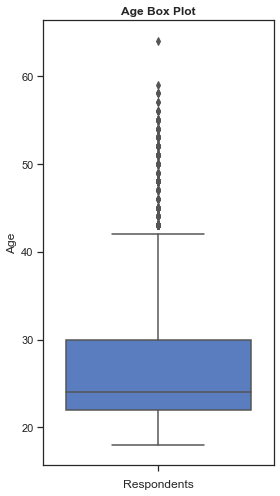

In [102]:
# Your code

plt.figure(figsize = (4, 7)) # set the size of the graph

# plot the box plot of age of all participants with title and axes labels
ax = sns.boxplot(y = "Age",
                 data = dataset)
ax.set_title("Age Box Plot",
             weight = "bold")
ax.set_xlabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-info">
    2. Calculate the five descriptive statistics as shown on the boxplot, as well as the mean.<br>
    Round your answer to the nearest whole number.

In [103]:
# get the required statistics from the age column of the dataset
# and round up to the nearest whole integer
desc_stats = dataset.Age.describe()[["min", "25%", "50%", "75%", "max", "mean"]]\
.round().astype(int)
desc_stats.to_frame() # print out the table

,Age
min,18
25%,22
50%,24
75%,30
max,64
mean,27


<span style="color: green">**Answer**</span><br>
The descriptive statistics for the age of all respondents are as follows: <br>
Minimum: 18 years <br>
First Quartile: 22 years <br>
Median: 24 years <br>
Third Quartile: 30 years <br>
Maximum: 64 years <br>
<br>
The mean age of all respondents is 27 years.

 <div class="alert alert-block alert-warning">
    3.i. Looking at the boxplot, what general conclusion can you make
    about the age of the participants? You must explain your answer with reference to all five descriptive statistics. Simply listing will not suffice. You must discuss the conclusions drawn based on these descriptive statistics' relationship to each other. You must also make mention of the outliers if there are any.<br>
    
    
   3.ii. Would the mode be greater or lower than the mean? Why?

<span style="color: green">**Answer i**</span><br>
Looking at the boxplot, its seen that most of the IT professionals are under the median age of 24 years. As the age data is positively skewed, the number of respondents with age less than the median age, 18-24 years of age, is higher, than that with more than the median age, with the median being on a lower side. Although, the difference between maximum age and 3rd quartile is quite high, compared to the difference between minimum age and 1st quartile.<br>
There are significant number of outliers in the data which are all beyond the maximum age of the boxplot. The maximum age, 64, is also a part of the outliers. If outliers are ignored, the maximum age according to the boxplot's IQR is just 42 years.

<span style="color: green">**Answer ii**</span><br>
The given age data, as seen in the boxplot, is positively skewed. By this, we can state that the mode will be lower than the mean.

  <div class="alert alert-block alert-info">
    4. Regardless of the errors that the data show, we are interested in working-age IT professionals, aged between 20 and 65.<br>
    
   Calculate how many respondents were under 20 or over 65?

In [105]:
# get the counts of respondents according to the mentioned age conditions
fun = {"Age": {"Under 20": lambda x: x[x < 20].count(),
               "Over 65": lambda x: x[x > 65].count()}}

# turn groups into column values
count = dataset.agg(fun).reset_index()

# rename the required columns
count = count.rename(columns = {"index": "AgeCondition",
                                "Age": "CountofRespondents"})
count # print out the table

,AgeCondition,CountofRespondents
0,Over 65,0
1,Under 20,90


<span style="color: green">**Answer**</span><br>
There are 90 respondents aged under 20 and 0 respondents aged over 65.

### 1.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Within the STEM fields, there are more males than females or other genders. In 2016 the Office of the chief scientist found that women held only 25% of jobs in STEM. Let's see how that compares to our participants. 

 <div class="alert alert-block alert-info">
    5. Plot the gender distribution of survey participants.

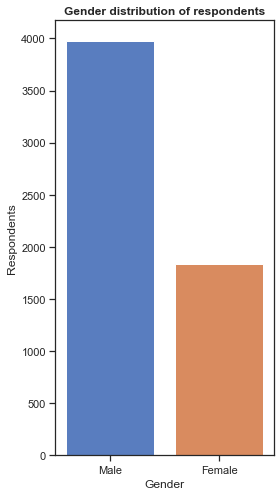

In [106]:
# Your code

plt.figure(figsize = (4, 7)) # set the size of the graph

# plot the gender distribution of respondents with title and axes labels
ax = sns.countplot(x = "Gender",
                   data = dataset)
ax.set_title("Gender distribution of respondents",
             weight = "bold")
ax.set_ylabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-info">
    6. Calculate what percentage of respondents were men and what percentage were women.<br>

In [70]:
# Your code

# define a function for calculating percentage
# this function is used in all further percentage calculation questions
def percentage(x, y):
    return (x / y) * 100

# get the total count of all respondents
total = dataset.Gender.count()

# group the dataset by gender and get the individual counts
groupby_gender = dataset.groupby(["Gender"]).size()

# calculate the percentage of the derived values
groupby_gender1 = groupby_gender.agg(lambda x: percentage(x, total))\
.round(2).reset_index()
# rename the required columns
groupby_gender1.rename(columns = {0: "Percentage"}, inplace = True)
groupby_gender1 # print out the table

,Gender,Percentage
0,Female,31.65
1,Male,68.35


<span style="color: green">**Answer**</span><br>
31.65% of respondents are female and 68.35% of respondents are male.

@exp1orer. (Apr 29, 2014). Answer to question: Pandas percentage of total with groupby.
Retrieved from: https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby.
Date accessed: Jan 12, 2020.

 <div class="alert alert-block alert-info">
    7. Let's see if there is any relationship between age and gender.<br>
    Create a box plot showing the age of all the participants according to gender.

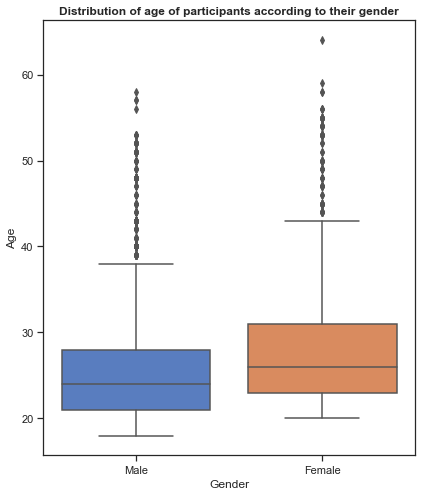

In [107]:
# Your code

# set the size of the graph
plt.figure(figsize = (6, 7))

# plot the age distribution between age and gender
# with title and axes labels
ax = sns.boxplot(x = "Gender",
                 y = "Age",
                 data = dataset)
ax.set_title("Distribution of age of participants according to their gender",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-info">
    8. What comments can you make about the relationship between the age and gender of the respondents?<br>

*Hint: You need to determine the descriptive statistics.*

In [109]:
# Your code

# get all the descriptive statistics for the age of all respondents
fun = {"Age": {"MinimumAge": "min",
               "FirstQuartile": lambda x: np.percentile(x, 25),
               "MedianAge": "median",
               "ThirdQuartile": lambda x: np.percentile(x, 75),
               "MaximumAge": "max",
               "MeanAge": "mean"}}

# group the dataset by gender and apply the functions
groupby_gender = dataset.groupby("Gender").agg(fun).round().astype(int)
# drop the top level in column hierarchy
groupby_gender.columns = groupby_gender.columns.droplevel(0)
# rename the first column
groupby_gender.rename(columns = {"": "Gender"}, inplace = True)
groupby_gender # print out the table

,MinimumAge,FirstQuartile,MedianAge,ThirdQuartile,MaximumAge,MeanAge
Gender,,,,,,
Female,20,23,26,31,64,28
Male,18,21,24,28,58,26


<span style="color: green">**Answer**</span><br>
According to the boxplots and descriptive statistics, it is seen that the age statistics of males are less than that of females, which tells that males are distributed in a lower range of age compared to females. A difference of at least 2 years between the ages of both genders is observed in each statistic.<br>
Both the plots and distributions are quite similar at their own range of ages, with high number of outliers.

### 1.3 Country
<a id="country"></a>
We know that people practice IT all over the world. The United States is thought of as a central 'hub' for commercial IT services as well as research followed by the United Kingdom and Germany. 

Because the field is evolving so quickly, and it may be that these perceptions, formed in the late 2000's are now inaccurate. So let's find out where IT professionals live.

 <div class="alert alert-block alert-info">
     9. Create a bar graph of the respondents according to which country they are from.<br>
    Find the percentage of respondents from the top 5 countries.<br>
    Print your display rounding to two decimal places before writing out your answer.


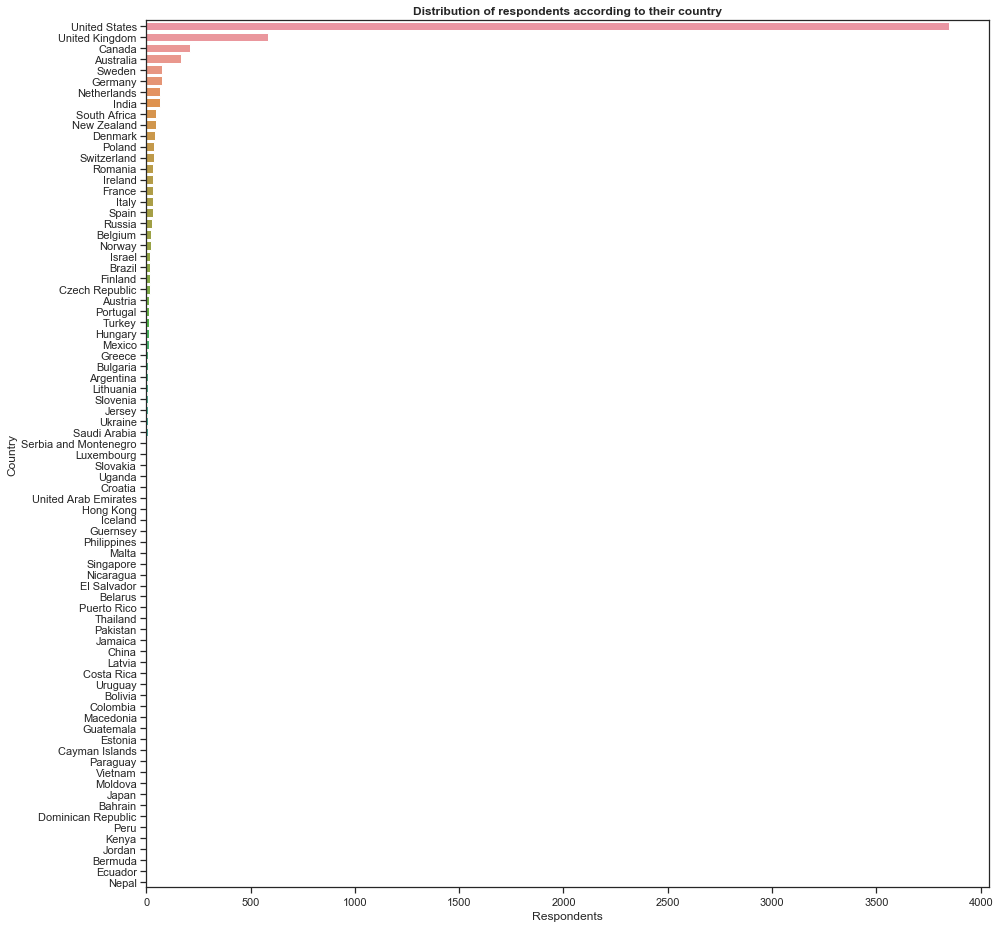

In [110]:
# Your code

plt.figure(figsize = (14, 13)) # set the size of the graph

# plot the graph of respondents sorted by their count per country
# with title and axes labels
ax = sns.countplot(y = "Country",
                   data = dataset,
                   order = dataset.Country.value_counts().index)
ax.set_title("Distribution of respondents according to their country",
             weight = "bold")
ax.set_xlabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

<div class="alert alert-block alert-info">
10. Find the percentage of respondents from the top 5 countries.<br>
    Print your display rounding to two decimal places before writing out your answer.

In [112]:
# get the value counts of top 5 countries and sort them highest to lowest
counts = pd.DataFrame(dataset.Country.value_counts().head(5))

# merge it with the original dataset with the above sorted order
# using the index for merging
new_index = counts.merge(dataset[["Country"]],
                         left_index = True,
                         right_on = "Country")
top5_dataset = dataset.reindex(new_index.index)

# group the dataset by country and get the individual counts
groupby_country = top5_dataset.groupby(["Country"]).size()
# calculate percentage for each country value
groupby_country1 = groupby_country.agg(lambda x: percentage(x, total)).round(2)
# convert it to a dataframe
top5 = pd.DataFrame(groupby_country1)
# rename the required columns
top5.rename(columns = {0: "Percentage"}, inplace = True)
# sort the dataframe by the calculated percentage
top5.sort_values(by = ["Percentage"], ascending = False, inplace = True)
top5 # print out the table

,Percentage
Country,
United States,66.15
United Kingdom,10.04
Canada,3.61
Australia,2.87
Sweden,1.32


<span style="color: green">**Answer**</span><br>
Percentage of respondents from the top 5 countries based on their counts are as follows: <br>
United States: 66.15 % <br>
United Kingdom: 10.04 % <br>
Canada: 3.61 % <br>
Australia: 2.87 % <br>
Sweden: 1.32 %

@cel. (Jun 11, 2015). Answer to question: Sorting entire csv by frequency of occurence in one column.
Retrieved from: https://stackoverflow.com/questions/30787391/sorting-entire-csv-by-frequency-of-occurence-in-one-column.
Date accessed: Jan 12, 2020.

 <div class="alert alert-block alert-warning">
    11. What comments can you make about the United States, the United Kingdom and Germany? Are
    these results consistent with what you expected?<br>
    Explain why.

<span style="color: green">**Answer**</span><br>
The number of respondents in the survey is clearly dominated coming from the United States, followed by the United Kingdom. Considering the population, education and job opportunities are significant in these 2 countries, which also attracts lot of immigrants coming from all over the world to secure jobs. The numbers that these 2 countries show are consistent and expected for becoming the leaders.<br>
Although, Germany is also a similar nation with lot of education and job opportunities, compared to other nations, with high market of employers. But according to the numbers, the result is unexpected, as the country comes low as 6th in the ranking.

 <div class="alert alert-block alert-info">
    12. Now that we have another demographic variable let's see if there is any relationship between country, age
    and gender. We are specifically interested in the top 5 countries.<br>
    Calculate the mean, median and count for the ages of each gender for each of these countries.<br>

*Hint: You may need to create a copy or slice.*

In [113]:
# Your code

# get all the required statistics for the age of the respondents from the top 5 countries
fun = {"Age": {"MeanAge": "mean",
               "MedianAge": "median",
               "Count": "count"}}

# group the top 5 countries' dataset by country and gender and apply
groupby_country_gender = top5_dataset.groupby(["Country", "Gender"])\
.agg(fun).round().astype(int)
# drop level 0 index
groupby_country_gender.columns = groupby_country_gender.columns.droplevel(0)
groupby_country_gender # print out the table

MeanAge  MedianAge  Count
Country        Gender                           
Australia      Female       28         26     44
               Male         27         25    123
Canada         Female       27         25     41
               Male         27         25    169
Sweden         Female       27         25     20
               Male         27         25     57
United Kingdom Female       26         24    164
               Male         25         22    420
United States  Female       29         26   1384
               Male         26         24   2462

 <div class="alert alert-block alert-warning">
    13. What Pattern do you notice about the relationship between age, gender for each of these countries? (if any).

<span style="color: green">**Answer**</span><br>
The common pattern that all these countries show is that the median age is less than the mean age, which tells us that the data is positively skewed. And the each count shows that the difference between hired males and females is significant and in favor of males. <br>
Also, except Canada and Sweden, there is an age difference for Australia and United Kingdom of 1 year, and 2 years for United States, between the median age of males and females, with males' age being less.<br>
In conclusion, males are hired more in quantity and at an early age when compared with females. Although, there's no age difference observed in Canada and Sweden.

### 1.4 Roles
<a id="roles"></a>
Now let's investigate the different roles assumed by IT professionals and how they are distributed. Since we are specifically interested in data science, we will also create a flag for each of the participants to indicate whether his/her role is data-science related. 

 <div class="alert alert-block alert-info">
    14. Plot a bar graph depicting the counts of different roles (each bar should represent the count of participants
    assuming a certain job role).

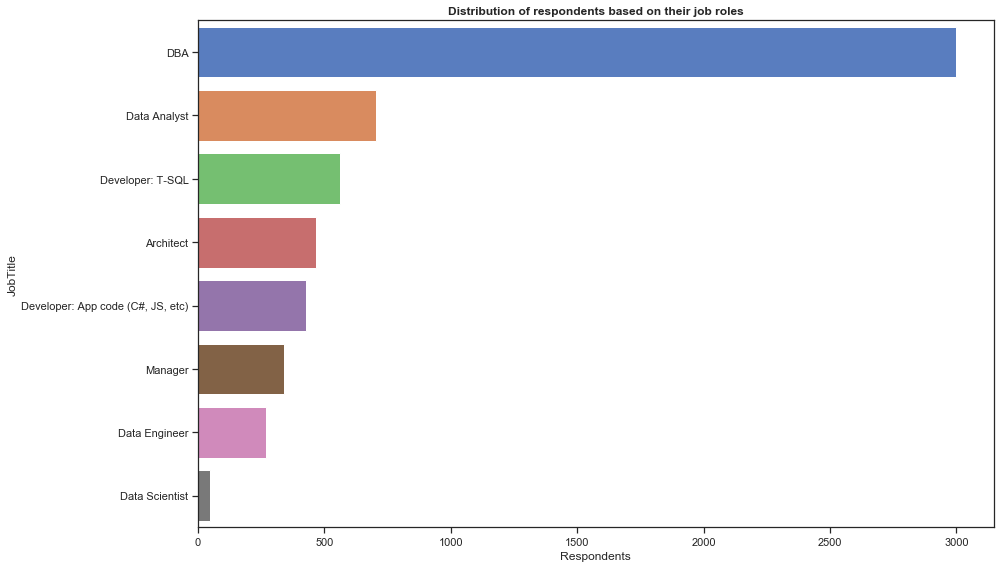

In [140]:
# Your code

plt.figure(figsize = (14, 8)) # set the size of the graph

# plot the graph of job roles based on their sorted counts with title and axes labels
ax = sns.countplot(y = 'JobTitle',
                   data = dataset,
                   order = dataset.JobTitle.value_counts().index)
ax.set_title("Distribution of respondents based on their job roles",
             weight = "bold")
ax.set_xlabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    15. What is the percentage of Data Scientists among the survey respondents?


In [115]:
# Your code

# get the total count of data scientists
ds_count = dataset[dataset.JobTitle == "Data Scientist"].JobTitle.count()
total = dataset.JobTitle.count() # get the total count of all respondents

perc = percentage(ds_count, total) # calculate the percentage of data scientists
perc = round(perc, 2) # round the percentage to 2 decimal places

# print out the answer
print("There are", perc, "percentage of Data Scientists among the survey respondents.")

There are 0.83 percentage of Data Scientists among the survey respondents.


<span style="color: green">**Answer**</span><br>
There are 0.83 percentage of Data Scientists among the survey respondents.

 <div class="alert alert-block alert-info">
   16. Data Scientists usually work closely with specific functions in organisations. Data Analysts and Data Engineers are among the top collaborators with Data Scientists. Since our analysis will now focus on data science roles.<br>

Create a boolean column "DataScienceRelated" which holds if a participant has a job title among "Data Scientist, Data Analyst or Data Engineer."

In [142]:
# Your code

# define a function for setting the boolean value for the job titles
def bool_data_science_related(x):
    if (x.JobTitle == "Data Scientist"):
        return True
    elif (x.JobTitle == "Data Analyst"):
        return True
    elif (x.JobTitle == "Data Engineer"):
        return True
    else:
        return False
    
# create a new boolean column in the original dataset
dataset["DataScienceRelated"] = dataset.agg(bool_data_science_related, axis = 1)
dataset # print out the dataset

,JobTitle,Gender,Age,SalaryUSD,Country,EmploymentStatus,YearsofExperience,Education,EducationIsComputerRelated,EmploymentSector,LookingForAnotherJob,KindsOfTasksPerformed,ToolsUsed,DataScienceRelated
0,Data Engineer,Male,21,650000.0,United States,Full time employee,3,Bachelors (4 years),No,NaN,No,"Build scripts & automation tools, Meetings & m...","Amazon RDS (any flavor), Python",True
1,Architect,Male,31,200000.0,United States,Full time employee,13,Bachelors (4 years),Yes,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python",False
2,Manager,Male,20,195000.0,United States,Full time employee,2,Bachelors (4 years),No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python",False
3,Architect,Male,31,130000.0,Australia,Full time employee,10,Masters,No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Amazon RDS (any flavor), Python",False
4,Data Analyst,Male,21,105000.0,United States,Full time employee,1,Masters,No,NaN,No,"Manual tasks, Meetings & management, Projects","Amazon RDS (any flavor), Python",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,Data Analyst,Male,23,92000.0,United States,Full time employee,5,Bachelors (4 years),No,NaN,No,"Build scripts & automation tools, Manual tasks...","Teradata, Python",True
5810,Data Analyst,Male,22,78000.0,United States,Full time employee,4,Bachelors (4 years),No,NaN,Yes,R&D,"Teradata, Python",True
5811,Data Analyst,Female,21,55000.0,Ireland,Full time employee,1,Bachelors (4 years),Yes,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Teradata, Python",True
5812,Data Analyst,Male,22,45000.0,United States,Full time employee,1,Bachelors (4 years),No,NaN,Yes,"Build scripts & automation tools, Manual tasks...","Teradata, Python, SSRS, PowerBI, Tableau",True


@foglerit. (Apr 16, 2017). Answer to question: Pandas - check if a string column contains a pair of strings.
Retrieved from: https://stackoverflow.com/questions/30787391/sorting-entire-csv-by-frequency-of-occurence-in-one-column.
Date accessed: Jan 14, 2020.

 <div class="alert alert-block alert-warning">
    17. What is the percentage of Data Science related roles among the survey participants?


In [117]:
# Your code

# get the count of data science related roles
ds_true_count = dataset[dataset.DataScienceRelated == True].JobTitle.count()
total = dataset.JobTitle.count() # get the total count of all respondents

perc = percentage(ds_true_count, total) # calculate the percentage of data scientists
perc = round(perc, 2) # round the percentage to 2 decimal places

# print out the answer
print("There are", perc, "percentage of Data Science related roles \
among the survey participants.")

There are 17.56 percentage of Data Science related roles among the survey participants.


<span style="color: green">**Answer**</span><br>
There are 17.56 percentage of Data Science related roles among the survey participants.

## 2. Education
<a id="education"></a>
***
So far, we have seen that there may be some relationships between age, gender and the country that the respondents are from.  Next, we should look at what their education is like. 

### 2.1 Formal education
<a id="formal"></a>

We saw in a recent activity that a significant number of data scientists job advertisements call for a masters degree or a PhD. Let's see if this is a reasonable ask based on the respondent's formal education. 

 <div class="alert alert-block alert-info">
    1. Plot a bar chart showing the percentage of each type of education for the three data science related roles.<br> 
    
*Hint: You should appropriately label your axes with a legend and a title*

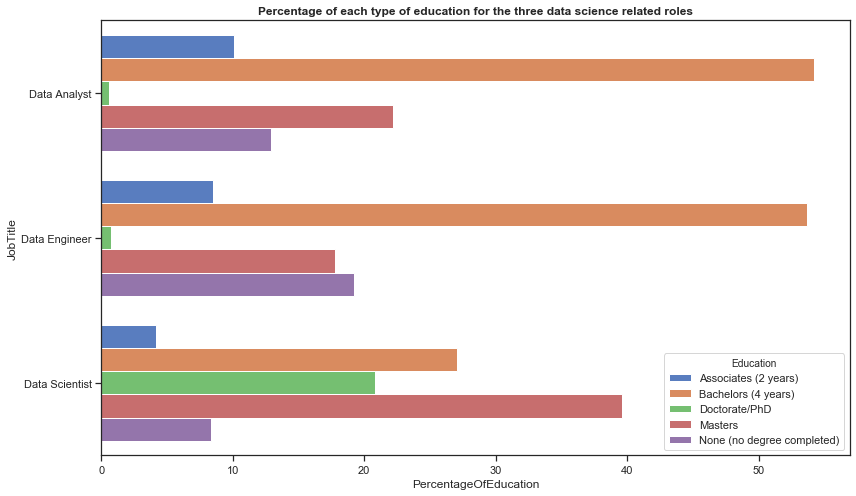

In [118]:
# filter the dataset to only data science related roles
ds_dataset = dataset[dataset.DataScienceRelated == True]

# group the dataset by job and get its individual count
groupby1 = ds_dataset.groupby("JobTitle").size()
df1 = pd.DataFrame(groupby1) # convert it to a dataframe

# group the dataset by job and education type
# get its individual count and reset the index
groupby2 = ds_dataset.groupby(["JobTitle", "Education"]).size().reset_index()
df2 = pd.DataFrame(groupby2) # convert it to a dataframe

# merge the 2 dataframes
merge_df = pd.merge(df1, df2, how = "outer", on = ["JobTitle"])
# rename the required columns
merge_df.rename(columns = {"0_x": "TotalCount", "0_y": "Count"},
                inplace = True)

# calculate the percentage and add it as a new column
merge_df["PercentageOfEducation"] = percentage(merge_df.Count,
                                               merge_df.TotalCount)


plt.figure(figsize = (12, 7)) # set the size of the graph

# plot the graph of calculated percentages according to the education and job roles
# with title, axes labels and legend
ax = sns.barplot(x = "PercentageOfEducation",
                 y = "JobTitle",
                 hue = "Education",
                 data = merge_df)
ax.set_title("Percentage of each type of education for the \
three data science related roles",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    2. Based on what you have seen, do you think that a Master's or Doctoral degree is too unrealistic for job advertisers looking for someone with data science skills or is it job-dependent?
<br>

<span style="color: green">**Answer**</span><br>
Respondents belonging to the Data Science related job roles are highly demanded in the market, and hence, job advertisers look for certain education degree as an eligibilty criteria. But as the graph shows, respondents' education varies through the data and is job-dependent.<br>
Considering Data Analysts and Data Engineers, a Master's degree is less occurred, approx. 20%, when compared to the Bachelor's degree, approx. 55%, but can still be sought for. Although, a Doctoral degree hardly exists for them, and can be declared as unrealistic for the job advertisers.<br>
And for Data Scientists, occurrence of Master's degree is high and the maximum as well, approx. 40%. And a Doctoral's degree is also found but in less quantity, approx. 20%. Data Scientist role require experts in the field, and seeking both the degrees are realistic for the job advertisers and can be asked for.

<div class="alert alert-block alert-info">
    3. Let's see if the trend is reflected in the Australian respondents.<br>
    Plot a bar chart like above but only for Australia, and display the counts of the number of Australian
    respondents holding a Doctoral degree for each of the three job roles as text output.

,Education,AustraliaCount
JobTitle,,
Data Analyst,Doctorate/PhD,1
Data Engineer,Doctorate/PhD,1
Data Scientist,Doctorate/PhD,6


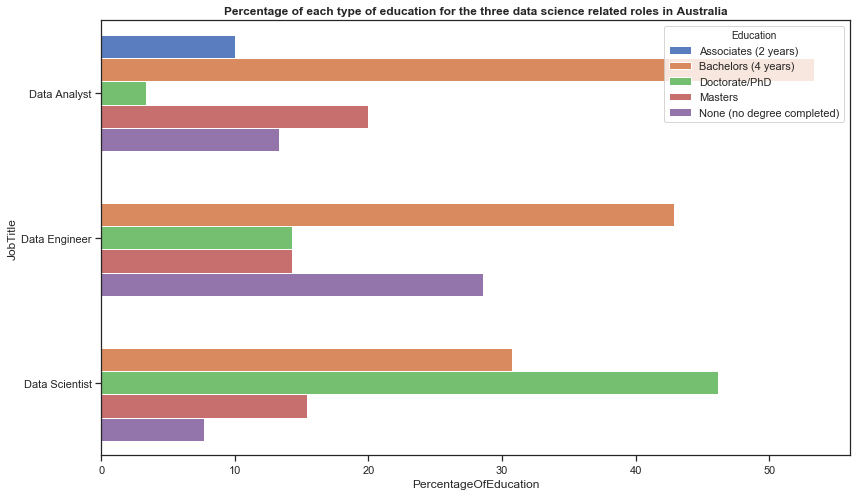

In [119]:
# filter the data science related roles dataset only for Australia
aus_ds_dataset = ds_dataset[ds_dataset.Country == "Australia"]

# group the dataset by job and get its individual count
groupby1 = aus_ds_dataset.groupby("JobTitle").size()
df1 = pd.DataFrame(groupby1) # convert it to a dataframe

# group the dataset by job and education type
# get its individual count and reset the index
groupby2 = aus_ds_dataset.groupby(["JobTitle", "Education"]).size().reset_index()
df2 = pd.DataFrame(groupby2) # convert it to a dataframe

# merge the 2 dataframes
merge_df = pd.merge(df1, df2, how = "outer", on = ["JobTitle"])
# rename the required columns
merge_df.rename(columns = {"0_x": "TotalCount", "0_y": "AustraliaCount"},
                inplace = True)

# calculate the percentage and add it as a new column
merge_df["PercentageOfEducation"] = percentage(merge_df.AustraliaCount,
                                               merge_df.TotalCount)


plt.figure(figsize = (12, 7)) # set the size of the graph

# plot the graph of calculated percentages according to the education and job roles
# with title, axes labels and legend
ax = sns.barplot(x = "PercentageOfEducation",
                 y = "JobTitle",
                 hue = "Education",
                 data = merge_df)
ax.set_title("Percentage of each type of education for the \
three data science related roles in Australia",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely


# filter the plotted dataframe only for Doctoral Degree for displaying the counts
doc_merge_df = merge_df[merge_df.Education == "Doctorate/PhD"][["JobTitle",
                                                                "Education",
                                                                "AustraliaCount"]]
doc_merge_df.set_index("JobTitle", inplace = True) # set the index to JobTitle column
doc_merge_df # print out the table

 <div class="alert alert-block alert-info">
    4. Display as text output the mean and median age of ALL respondents according to each degree type.

In [82]:
# Your code

# get the mean and median for age of all the respondents
fun = {"Age": {"MeanAge": "mean",
               "MedianAge": "median"}}

# group the dataset by education and apply the functions
groupby_education = dataset.groupby("Education").agg(fun).astype(int)
# drop the top level in column hierarchy
groupby_education.columns = groupby_education.columns.droplevel(0)
# rename the first column
groupby_education.rename(columns = {"": "Education"}, inplace = True)
groupby_education # print out the table

,MeanAge,MedianAge
Education,,
Associates (2 years),26,24
Bachelors (4 years),26,24
Doctorate/PhD,31,29
Masters,27,25
None (no degree completed),26,24


## 3. Employment
<a id="employment"></a>
***
Many of you will be seeking work after your degree. Let's have a look at the state of the employment market for the respondents of the survey. 

Let's have a look at the data. 


### 3.1 Employment status
<a id="status"></a>
The type of employment will affect the salary of a worker. Those employed part-time will likely earn less than those who work full time. 

 <div class="alert alert-block alert-info">
 1. Plot the type of employment the respondents have on a bar chart for respondents who do not assume data science related roles.

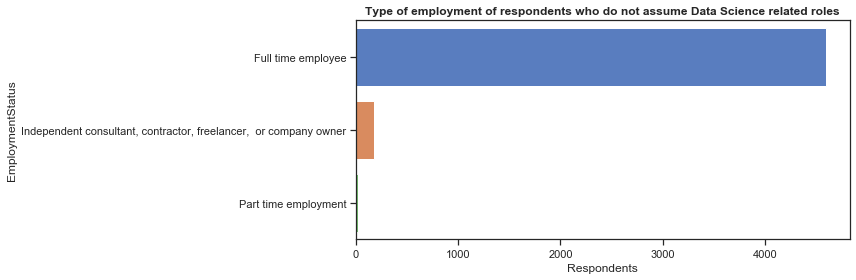

In [132]:
# Your code

plt.figure(figsize = (12, 4)) # set the size of the graph

# plot the graph of employment type for respondents of non data science related roles
# with title and axes labels
ax = sns.countplot(y = "EmploymentStatus",
                   data = dataset[(dataset.DataScienceRelated == False)])
ax.set_title("Type of employment of respondents who do not assume \
Data Science related roles",
             weight = "bold")
ax.set_xlabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-info">
    2. Now plot the type of employment the respondents have on a bar chart only for those assuming data science related roles

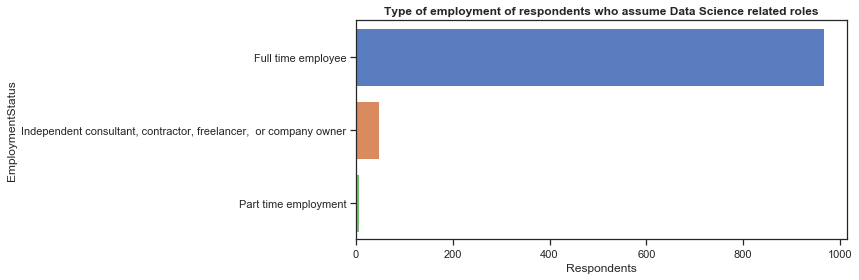

In [133]:
# Your code

plt.figure(figsize = (12, 4)) # set the size of the graph

# plot the graph of employment type for respondents of data science related roles
# with title and axes labels
ax = sns.countplot(y = "EmploymentStatus",
                   data = dataset[(dataset.DataScienceRelated == True)])
ax.set_title("Type of employment of respondents who assume Data Science related roles",
             weight = "bold")
ax.set_xlabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    3. Comparing the two graphs, would you say that the data science roles differ in the type of employment as opposed to non-data science roles?

Explain your answers.

<span style="color: green">**Answer**</span><br>
Looking at both the graphs, the observations are very similar. We can say that the type of employment for both type of roles, data science and non-data science, are highly inclined towards being full-time. A few number of independent consultants, contractors, freelancers or company owners do exist, but part time employees are negligible according to the observation.<br>
The reason being requiring high and long-term commitment from the employees, as they will be handling and analysing huge amounts of sensitive data, on a daily basis. Such projects are usually run for a long time and temporary resources cannot be preferred in such cases.

 <div class="alert alert-block alert-info">
    4. Let's investigate whether the type of employment is country dependent.<br>
    Print out the percentages of all respondents who are employed full time in Australia, United Kingdom and the
    United States.

In [85]:
# filter the dataset only for Australia, United Kingdom and United States
au_uk_us_dataset = dataset[(dataset.Country == "Australia") \
                        | (dataset.Country == "United Kingdom") \
                        | (dataset.Country == "United States")]
# group the dataset by country and get the individual count
groupby1 = au_uk_us_dataset.groupby("Country").size()
df1 = pd.DataFrame(groupby1) # convert it to a dataframe

# filter the above country dataset only for full time employees 
full_time_dataset_count = au_uk_us_dataset[(au_uk_us_dataset\
                                            .EmploymentStatus == "Full time employee")]
# group the dataset by country and get the individual count
groupby2 = full_time_dataset_count.groupby("Country").size()
df2 = pd.DataFrame(groupby2) # convert it to a dataframe

# merge the 2 dataframes
merge_df = pd.merge(df1, df2, how = "outer", on = ["Country"])
# rename the required columns
merge_df.rename(columns = {"0_x": "Total_Count", "0_y": "Full_Time_Count"},
                inplace = True)
# calculate the percentage on retreived values
merge_df = merge_df.agg(lambda x: percentage(x, merge_df.Total_Count)).round(2)
# rename the required columns
merge_df.rename(columns = {"Full_Time_Count": "PercentageOfFullTimeRespondents"},
                inplace = True)
merge_df = merge_df.drop("Total_Count", axis = 1) # drop the excessive column
merge_df # print out the table

,PercentageOfFullTimeRespondents
Country,
Australia,87.43
United Kingdom,92.64
United States,97.63


Remember earlier, we saw that age seemed to have some interesting characteristics when plotted with other variables. 

Let's find out the median age of employees by type of employment. 

 <div class="alert alert-block alert-info">
    5. Plot a boxplot of the respondents age, grouped by employment type.

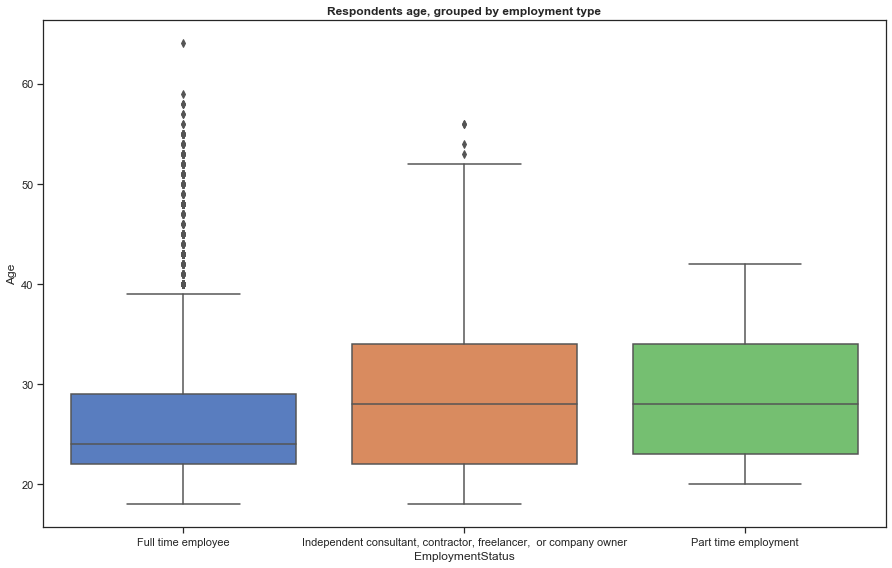

In [86]:
# Your code

plt.figure(figsize = (12.5, 8)) # set the size of the graph

# plot the boplot for age of respondents according to their employment type
# with title and axes labels
ax = sns.boxplot(x = "EmploymentStatus",
                 y = "Age",
                 data = dataset)
ax.set_title("Respondents age, grouped by employment type",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    6. What are your observations?

<span style="color: green">**Answer**</span><br>
The boxplot shows us the different age groups of respondents according to the different employment types.<br>
Full time employees are generally seen as a group of young respondents, with approx. 39 years as the maximum age. Maximum employees are in the age range of 18 to 24 years. Although, there are many outliers too.<br>
Independent consultants, contractors, freelancers and company owners are distributed in all the ages, starting from approx. 18 to 52 years. The respondents are symmetrically distributed in this employment type between the age of 22 years to 34 years. The maximum age is high upto approx. 52 years, with less number of outliers.<br>
Part time employees are seen in the middle range of the total age range. Starting at approx. 20 years of age to a maximum of 42 years. These respondents are almost symmetrically distributed as well, but majority still lies in the age range of 20 to 28 years.

 <div class="alert alert-block alert-info">
    7. You may be wondering if a relevant Computer degree is necessary to
    help gain full-time employment after graduation. <br>
    Plot the respondents' employment types (for all respondents) for each
    of the two categories of "EducationIsComputerRelated".

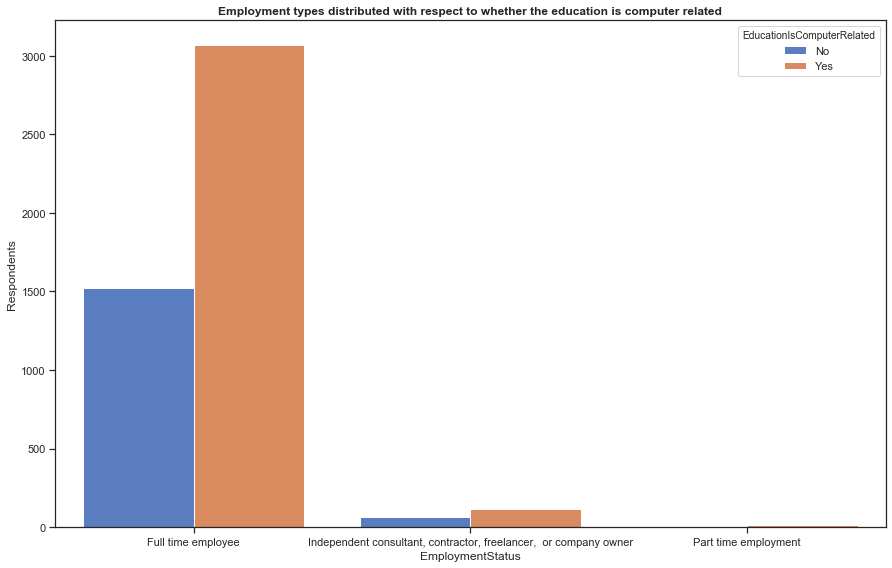

In [122]:
# Your code

plt.figure(figsize = (12.5, 8)) # set the size of the graph

# plot the graph of respondents
# according to their employment type and computer related knowledge
# with title, axes labels and legend
ax = sns.countplot(x = "EmploymentStatus",
                   hue = "EducationIsComputerRelated",
                   data = dataset)
ax.set_title("Employment types distributed with respect to whether \
the education is computer related",
             weight = "bold")
ax.set_ylabel("Respondents")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    8. Looking at the graph, does holding a computer-related degree improves your chances of securing a full-time
    job? <br>
    Explain your answers.

<span style="color: green">**Answer**</span><br>
Observing from the graph, holding a computer-related degree does make a significant impact on the chances of securing a full-time job. The number of full time employees who's education is computer related, is approximately double than that of employees who's education is not computer related. That is a huge difference, and may affect the job security of any aspirant. A similar trend can be observed in the other 2 employment types, although, the total number of respondents here are quite less than the full-time ones.<br>
Looking at the data, all job roles mostly belong to Computer Science related fields. This clarifies the need of computer related education among the job seeking graduates.


### 3.2 Job Satisfaction
<a id="satisfaction"></a>
Let's now investigate how happy IT professionals are about their jobs. It is also relevant to look at the years of experience to see whether the job gets boring after a while.

 <div class="alert alert-block alert-info">
9. Create a bar chart for the percentage of respondents who are looking for another job grouped by the different job titles.

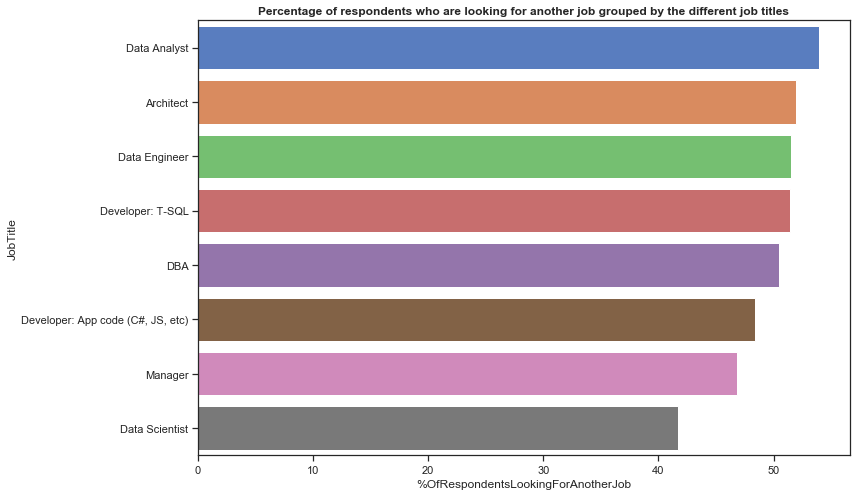

In [123]:
# group the dataset by job and get the individual count
groupby1 = dataset.groupby("JobTitle").size()
df1 = pd.DataFrame(groupby1) # convert it to a dataframe

# filter the dataset only for the respondents looking for another job
looking_for_job_dataset = dataset[(dataset.LookingForAnotherJob == "Yes")]
# group the dataset by job and get the individual count
groupby2 = looking_for_job_dataset.groupby("JobTitle").size()
df2 = pd.DataFrame(groupby2) # convert it to a dataframe

# merge the 2 dataframes
merge_df = pd.merge(df1, df2, how = "outer", on = ["JobTitle"])
# rename the required columns
merge_df.rename(columns = {"0_x": "Total_Count", "0_y": "Count"},
                inplace = True)

# calculate the percentage on retreived values
merge_df = merge_df.agg(lambda x: percentage(x, merge_df.Total_Count)).reset_index()
# rename the required columns
merge_df.rename(columns = {"Count": "%OfRespondentsLookingForAnotherJob"},
                inplace = True)
merge_df = merge_df.sort_values(by = ["%OfRespondentsLookingForAnotherJob"],
                                ascending = False)

plt.figure(figsize = (12, 7)) # set the size of the graph

# plot the graph of calculated percentage of respondents
# looking for another job according to thier job roles
# with title and axes labels
ax = sns.barplot(x = "%OfRespondentsLookingForAnotherJob",
                 y = "JobTitle",
                 data = merge_df)
ax.set_title("Percentage of respondents who are looking for another \
job grouped by the different job titles",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    10. What are the two roles that have the highest and lowest percentage of employees looking for other jobs?

<span style="color: green">**Answer**</span><br>
Data Analysts are the leaders in this area, with almost 55% of employees looking for another job.<br>
And, on the other hand, Data Scientists are the ones with the least number, approx. 42%, who are seeking other opportunities.

 <div class="alert alert-block alert-info">
    11. Let's focus on data science-related roles. Plot a box plot depicting the distribution of years-of-experience of those respondents who are looking for another job versus those who are not for each of the three roles.

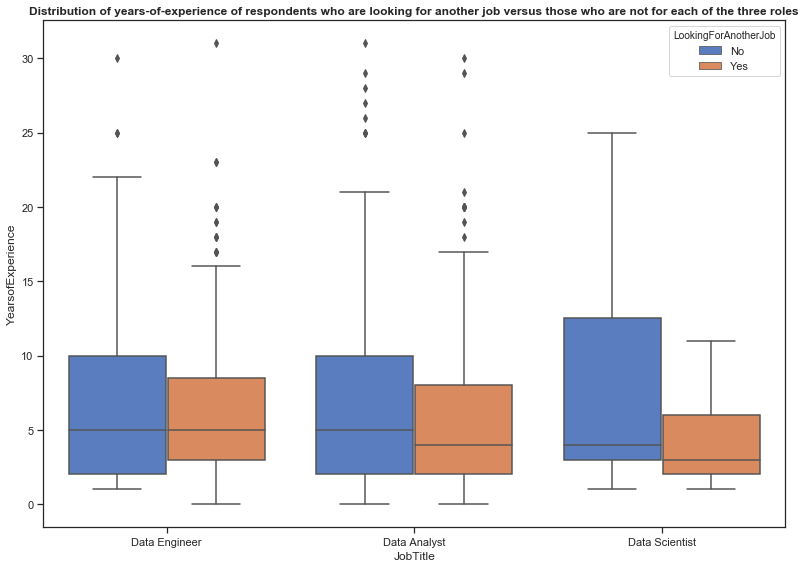

In [124]:
# Your code

plt.figure(figsize = (12, 8)) # set the size of the graph

# plot the boxplot for above mentioned conditions
# only for the data science related respondents
# with title, axes labels and legend
ax = sns.boxplot(x = "JobTitle",
                 y = "YearsofExperience",
                 hue = "LookingForAnotherJob",
                 data = dataset[(dataset.DataScienceRelated == True)])
ax.set_title("Distribution of years-of-experience of respondents who are looking for \
another job versus those who are not for each of the three roles",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    12. What can you say about the years of experience as to whether it impacts happiness?

<span style="color: green">**Answer**</span><br>
According to the graph, respondents seeking for other jobs mostly fall in the less years-of-experience range compared to the ones who are not looking for other jobs. Although, there are few outliers in the data for Data Engineers and Data Analysts. But as the common pattern suggests, employees with high years-of-experience are not looking for another job.<br>
By this, we can imply that as the employees progress in their career, gaining experience, they settle in one company and are happy with their job role.

## 4. Salary
<a id="salary"></a>

Data science is considered a very well paying role and was named 'best job of the year' for 2019. 

We would like to investigate in this section the different salary ranges for the different job roles in the IT industry and compare it to those of Data Science roles. 

### 4.1 Salary overview
<a id="overview"></a>
Note that the salaries given in the dataset is in USD. If we are to investigate the salaries in AUD, we need to consider the currency conversion. 

You can use the following rate of conversion:

`1 USD = 1.47 AUD` 

Let's have a look at the data. 

 <div class="alert alert-block alert-info">
    1. Create a derived column "SalaryAUD" containing the converted salary data into Australian Dollars (AUD).<br>
    Print out the maximum and median salary in AUD for each of the job roles in our dataset. 

In [135]:
# Your code

# define a function for converting salary from USD to AUD
def salary_aud(x):
    x = x["SalaryUSD"] * 1.47
    return x

# create a new column in dataset for storing the AUD converted salary
dataset["SalaryAUD"] = dataset.agg(salary_aud, axis = 1)

# get the max and median of salary
fun = {"SalaryAUD": {"MedianSalaryAUD": "median",
                     "MaximumSalaryAUD": "max"}}

# group the dataset by job and apply the functions
groupby_job = dataset.groupby("JobTitle").agg(fun)
# drop the top level in column hierarchy
groupby_job.columns = groupby_job.columns.droplevel(0)
# rename the first column
groupby_job.rename(columns = {"": "Job Title"}, inplace = True)
groupby_job # print out the table

,MedianSalaryAUD,MaximumSalaryAUD
JobTitle,,
Architect,176400.0,514500.00
DBA,132300.0,1411200.00
Data Analyst,113190.0,624750.00
Data Engineer,139650.0,955500.00
Data Scientist,163170.0,235200.00
"Developer: App code (C#, JS, etc)",117600.0,285180.00
Developer: T-SQL,124950.0,1036350.00
Manager,161700.0,924419.79


 <div class="alert alert-block alert-warning">
    2. Do those figures confirm that data scientists are well paid?

<span style="color: green">**Answer**</span><br>
According to the numbers above, the median salary of Data Scientists is ranked among the top 2. Which says that, yes, Data Scientists are well paid in comparison to all the job roles retrieved from the data.<br>
Although, looking at the maximum salary, it tells a different story. The numbers are significantly less, but, the data includes outliers, and that has affected the maximum salary drastically.

### 4.2 Salary by country
<a id="countrysal"></a>

Since each country has different cost of living and pay indexes, we want to compare these jobs only in Australia.

<div class="alert alert-block alert-info">
    3. Plot boxplot chart of the Australian respondents salary distribution grouped by the different job titles.

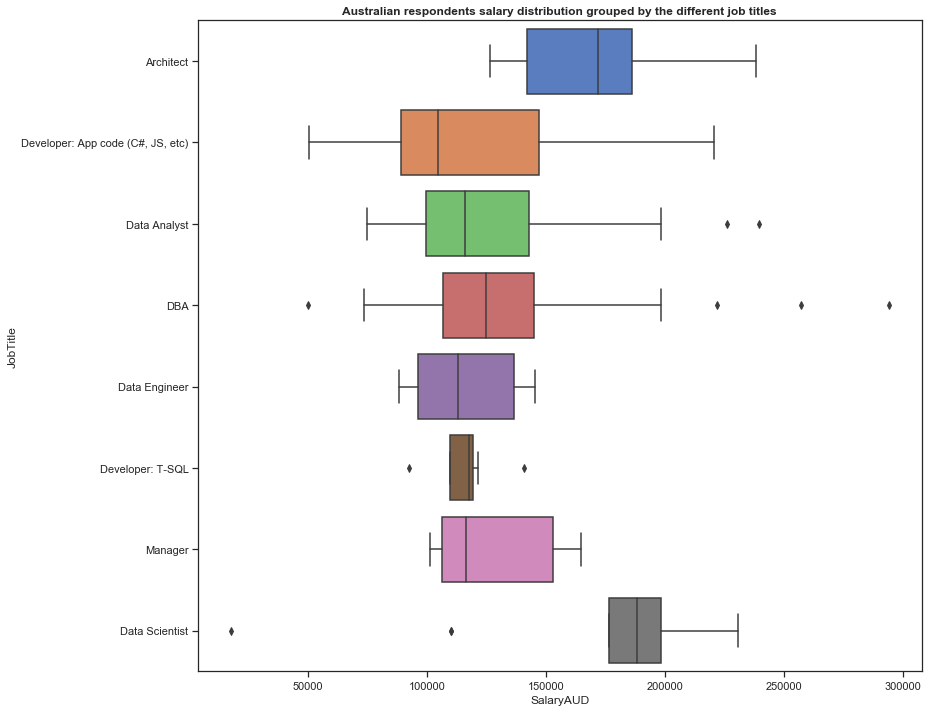

In [127]:
# Your code

plt.figure(figsize = (13, 10)) # set the size of the graph

# plot the boxplot for salary of respondents according to their job roles
# with title and axes labels
ax = sns.boxplot(x = "SalaryAUD",
                 y = "JobTitle",
                 data = dataset[(dataset.Country == "Australia")])
ax.set_title("Australian respondents salary distribution grouped \
by the different job titles",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    4. How are data scientists paid in comparison to other roles in Australia?

<span style="color: green">**Answer**</span><br>
As the boxplot suggests, Data Scientists in Australia are paid above the average salary of all the job roles combined. The range of salary for them mainly occurs from approx. 175,000 AUD to 230,000 AUD. The minimum salary coincides with the 1st quartile of the salary, which implies that the beginning salary for Data Scientists is also quite high in Australia. Morevoer, the distribution is slightly left skewed, leaving the majority employees paid above the median salary among all the Data Scientists.<br>

<div class="alert alert-block alert-info">
    5. Australia's salaries look pretty good in general. Is that the case for all other countries?<br>
    Plot the salaries of all countries on a bar chart (with error bars).<br>
    
   *Hint: Consider all job titles and filter for full-time employees only*

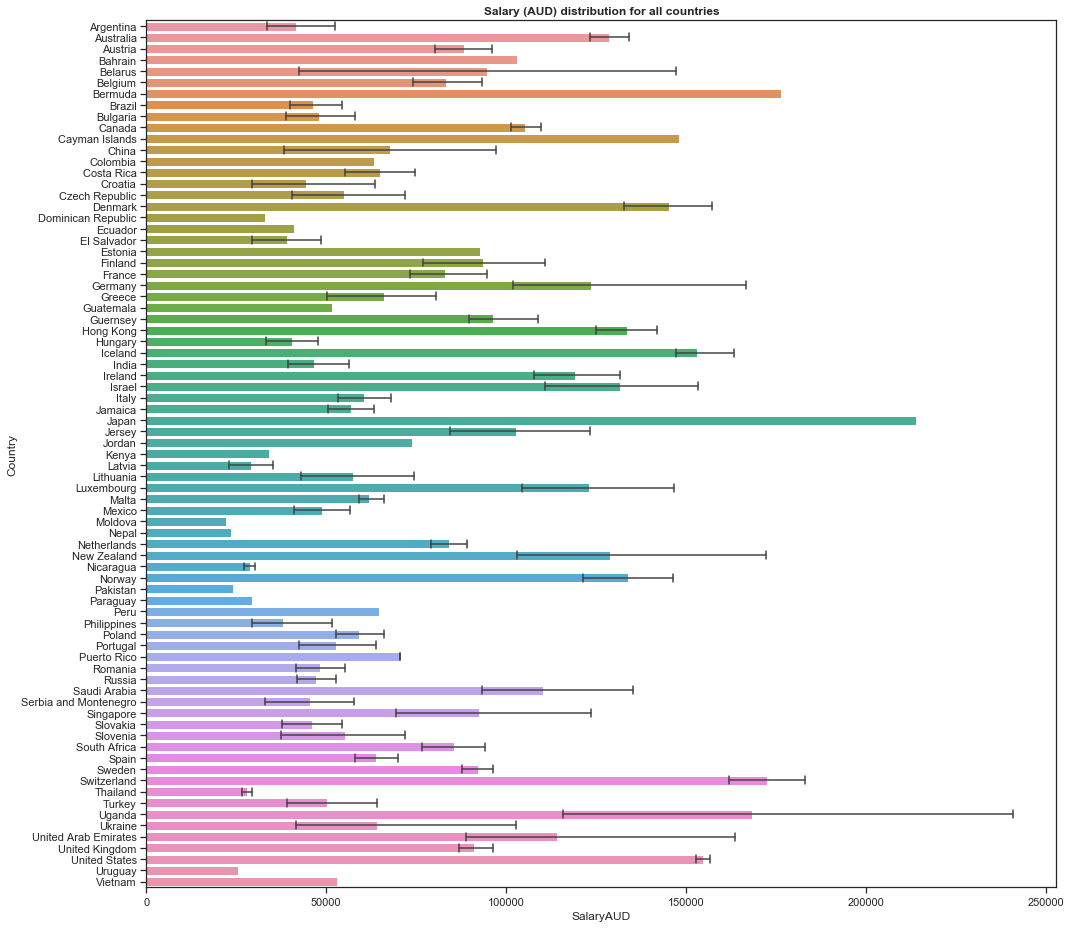

In [92]:
# Your code

# sort the dataset according to the countries (alphabetically)
sorted_dataset = dataset.sort_values("Country")

plt.figure(figsize = (15, 13)) # set the size of the graph

# plot the graph for salary distribution for all the countries
# with title, axes labels and error bars
ax = sns.barplot(x = "SalaryAUD",
                 y = "Country",
                 data = sorted_dataset[(sorted_dataset\
                                        .EmploymentStatus == "Full time employee")],
                 capsize = 0.7,
                 errwidth = 1.5)
ax.set_title("Salary (AUD) distribution for all countries",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    6. What do you notice about the distributions? What do you think is the cause of this?

<span style="color: green">**Answer**</span><br>
According to the graph, countries like Japan and Bermuda are seen with the highest paid employees. But according to the data, these countries have only 1 respondent entry each, and hence, deducting exact results based on that cannot be correct.<br>
Leaders like the United States, United Kingdom, Canada and Australia show an intermediate level of salary. They have a high number of respondent entries in the survey data, and hence, high variance in the results is observed.<br>
To sum up, the above graph is not 100% correct as the expected results, and is only based on the retrived data.

### 4.3 Salary and Gender
<a id="gender_salary"></a>
The gender pay gap in the tech industry is a big talking point. Let's see if the respondents are noticing the effect.

<div class="alert alert-block alert-info">
    7. Plot the salaries of all respondents grouped by gender on a boxplot.

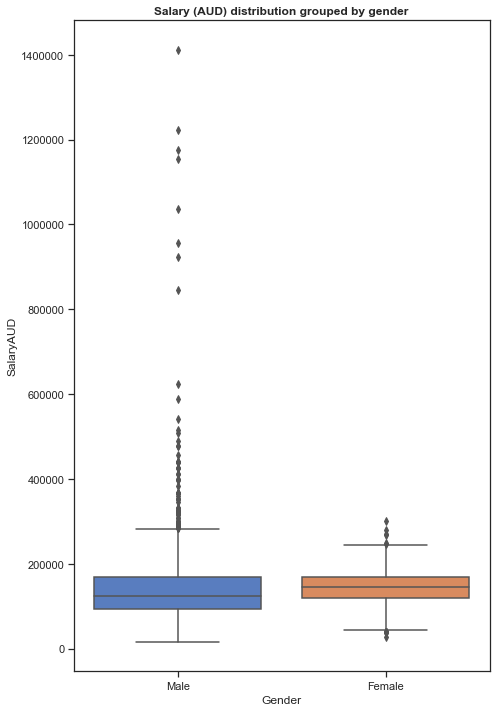

In [93]:
# Your code

plt.figure(figsize = (7, 10)) # set the size of the graph

# plot a boxplot for salary of respondents according to their gender
# with title and axes labels
ax = sns.boxplot(x = "Gender",
                 y = "SalaryAUD",
                 data = dataset)
ax.set_title("Salary (AUD) distribution grouped by gender",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    8. What do you notice about the distributions?



<span style="color: green">**Answer**</span><br>
As the boxplot shows, the salary distribution of male employees has a broader range than that of female employees. In comparison, female employees are already less in number, and their maximum salary is lesser than males too. Although, the mimimum salary is on a higher side for females.<br>
On the contrary, the median salary for females is higher than the males, which tells that majority females are well paid.
But, there are many outliers beyond the maximum salary for males reaching upto approx. 1,400,000 AUD, and very few for females, reaching only upto 300,000 AUD. The comparison seems unrealistic.

<div class="alert alert-block alert-info">
    9. The salaries may be affected by the country the respondent is from. In Australia, the weekly difference in pay
    between men and women is 17.7%, and in the United States it is 26%.<br>
    Print the median salaries of Australia, United States and India grouped by gender.

In [129]:
# Your code

# filter the dataset only for Australia, United States and India
au_us_in_dataset = dataset[(dataset.Country == "Australia") \
                         | (dataset.Country == "United States") \
                         | (dataset.Country == "India")]

# get the median of salaries
fun = {"SalaryAUD": {"MedianSalaryAUD": "median"}}

# group the dataset by country and gender and apply the functions
groupby_country_gender = au_us_in_dataset.groupby(["Country", "Gender"]).agg(fun)
# drop the top level in column hierarchy
groupby_country_gender.columns = groupby_country_gender.columns.droplevel(0)
groupby_country_gender # print out the table

MedianSalaryAUD
Country       Gender                 
Australia     Female         139650.0
              Male           122010.0
India         Female          48142.5
              Male            34251.0
United States Female         147602.7
              Male           154350.0

### 4.4 Salary and formal education
<a id="education_salary"></a>

Is getting your master's really worth it ?
Do PhDs get more money?

Let's see.

<div class="alert alert-block alert-info">
    10. Plot the salary distribution of all respondants and group by formal education type on a boxplot.


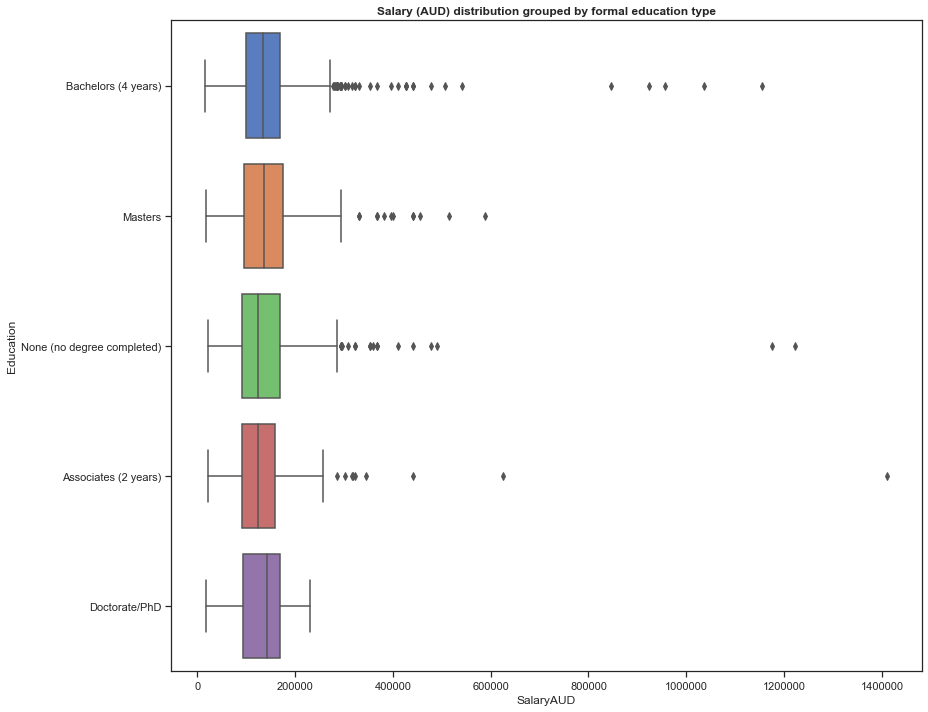

In [95]:
# Your code

plt.figure(figsize = (13, 10)) # set the size of the graph

# plot the boxplot for salary of respondents according to their education
# with title and axes labels
ax = sns.boxplot(x = "SalaryAUD",
                 y = "Education",
                 data = dataset)
ax.set_title("Salary (AUD) distribution grouped by formal education type",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    11. Is it better to get your Masters or PhD?<br>
    Explain your answer.

<span style="color: green">**Answer**</span>
Looking at the boxplot, it is seen that the median salary PhD degree holders is slightly greater than that of Masters degree holders. But, the data also suggests that the maximum salary for PhD degree holders is less when caompared to Masters degree holders.<br>
More employees with high salaries might occur for the PhD degree holders as the data is left skewed. On the other hand, the salaries for Masters degree is almosst evenly distributed throughout its range. There are some outliers beyond the maximum salary for Masters degree, and none for PhD degree holders.<br>
In conclusion, getting a Masters degree is better in terms of salary, as the maximum salary is higher than PhD degree holders. The distribution is close to symmetric as well, with some outliers with even higher salaries.

### 4.5 Salary and Employment Sector
<a id="sector_salary"></a>

*Do government jobs pay better than private sector?*
*Does it differ based on the country?*

Let's see.

<div class="alert alert-block alert-info">
    12. Plot a bar chart (with error bars) of the salaries of respondents for each of the employment sectors.

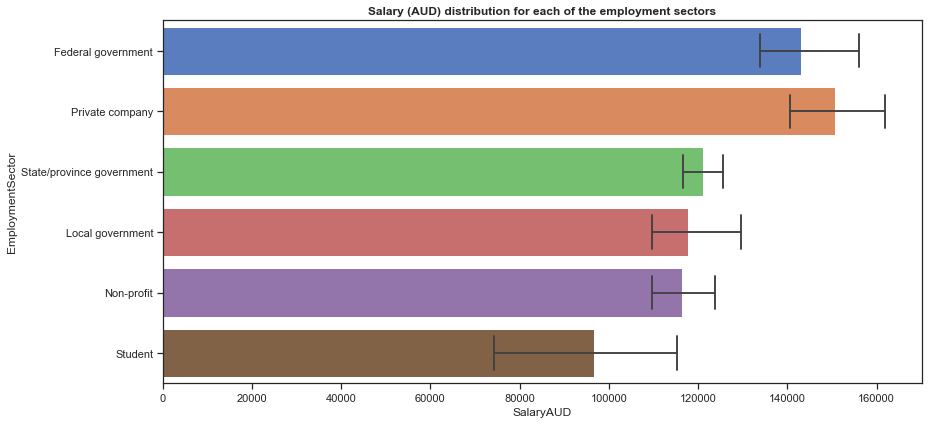

In [137]:
# Your code

plt.figure(figsize = (13, 6)) # set the size of the graph

# plot the graph for salary of respondents according to their employment sectors
# with title, axes labels and error bars
ax = sns.barplot(x = "SalaryAUD",
                 y = "EmploymentSector",
                 data = dataset,
                 capsize = 0.55,
                 errwidth = 1.9)
ax.set_title("Salary (AUD) distribution for each of the employment sectors",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

 <div class="alert alert-block alert-warning">
    13. Which seems to be the highest paying sector overall? <br>
    Do you think it would differ based on the country?<br>
    Propose a method to find out and explain your answer. 

<span style="color: green">**Answer**</span><br>
According to the graph, the private company sector seems to be the highest paying sector in comparison to all.<br>
Yes, the results would differ based on the country.
The best way of finding it would be to plot a graph of the salaries of respondents for each country grouped by their employment sector. Additionally, getting the count of employees in each sector would also support the observations. This would easily help us compare the exact distribution of the pays of employment sectors, for each country.

## 5. Predicting salary
<a id="pred"></a>

We have looked at many variables and seen that there are a lot of factors that could affect your salary.  

Let's say we wanted to reduce it; one method we could use is a linear regression. This is a basic but powerful model that can give us some insights. Note though, there are more robust ways to predict salary based on categorical variables. But this exercise will give you a taste of predictive modelling.

<div class="alert alert-block alert-info">
    1. Plot the salary and years-of-experience of respondants on a scatterplot.

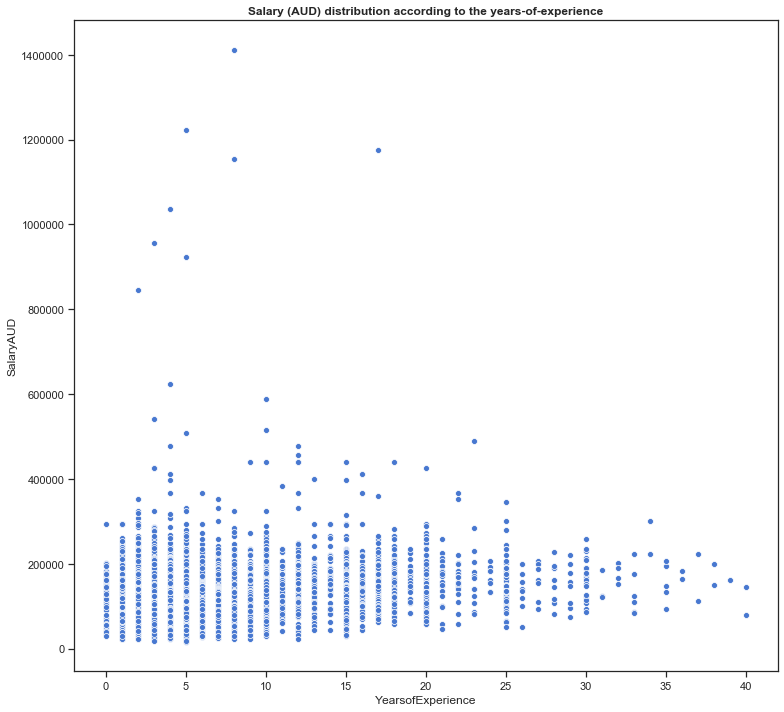

In [97]:
# Your code

plt.figure(figsize = (11, 10)) # set the size of the graph

# plot the scatterplot of salary and years-of-experience of the respondents
# with title and axes labels
ax = sns.scatterplot(x = "YearsofExperience",
                     y = "SalaryAUD",
                     data = dataset)
ax.set_title("Salary (AUD) distribution according to the years-of-experience",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

<div class="alert alert-block alert-info">
    2. Let's refine this.<br>
    Remove Salary outliers using 2-sigma rule and then create a linear regression between the salary and years-of
    experience of full-time respondents.<br>
    Plot the linear fit over the scatterplot.

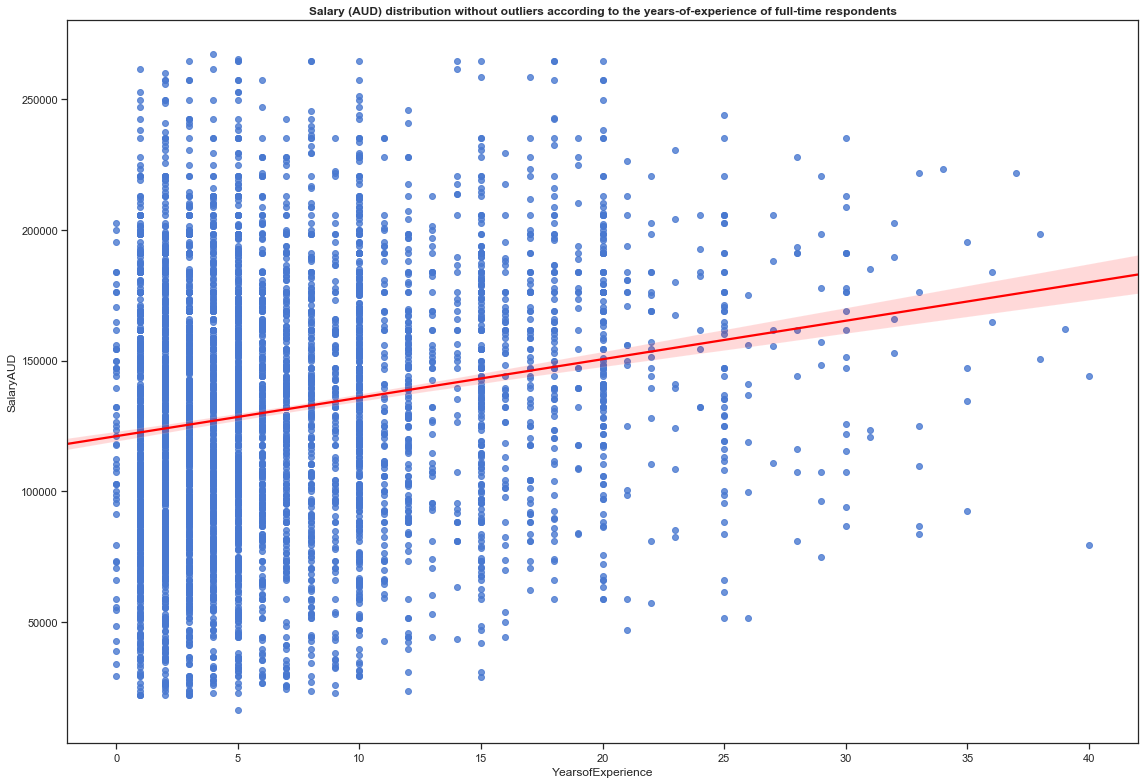

In [98]:
# remove the outliers in salary using 2-sigma rule
no_outlier_salary_dataset = dataset[np.abs(dataset.SalaryAUD - dataset.SalaryAUD.mean())\
                                    <= (2 * dataset.SalaryAUD.std())]

plt.figure(figsize = (16, 11)) # set the size of the graph

# create a linear regression on the plotted scatterplot
# for above mentioned conditions only for full time employees
# with title and axes labels
ax = sns.regplot(x = "YearsofExperience",
                 y = "SalaryAUD",
                 data = no_outlier_salary_dataset\
                 [(no_outlier_salary_dataset.EmploymentStatus == "Full time employee")],
                 line_kws = {"color": "Red"})
ax.set_title("Salary (AUD) distribution without outliers according to the \
years-of-experience of full-time respondents",
             weight = "bold")
plt.tight_layout() # fit the plot within the figure nicely

@CT Zhu. (Apr 21, 2014). Answer to question: Detect and exclude outliers in Pandas data frame.
Retrieved from: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame.
Date accessed: Jan 17, 2020.

 <div class="alert alert-block alert-warning">
3. Do You think that this is a good way to predict salaries?

Explain your answer.

<span style="color: green">**Answer**</span><br>
Yes, the regression line can be said as a very good way of predicting salaries. And removing outliers just helps us avoid the deviation from unrealistic and bad data.<br>
It helps us get a clear visualisation of the increase or decrease in the distribution flow of any kind of numeric data. In this case, salaries of respondents increase over their career progress, as they spend more time in the industry and gain more experience. It only helps them grow in the field, with better knowledge, helping them secure better salary packages from the employers.

## 6. Tasks and tools
<a id="tandt"></a>

You might be wondering (or not) what different tasks you will be assigned in a data science role and what kind of tools would you be using the most? 

In this section, we perform necessary text processing to investigate such aspects.

### 6.1 Data science common tasks
<a id="DS_tasks"></a>

We focus here on the three data science job roles and investigate the tasks usually carried out in such roles.


 <div class="alert alert-block alert-info">
    1. Investigate the 'KindsOfTasksPerformed' column and perform the required text processing to enable you to plot a word cloud depicting the frequency of the different tasks.

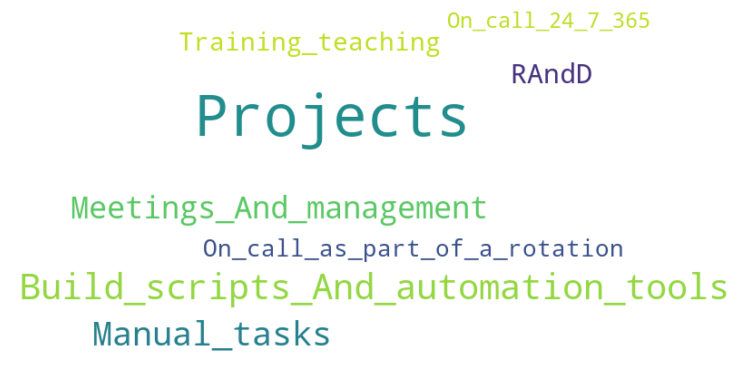

In [99]:
# Your code

# remove all the null entries from the kinds of tasks performed column
no_null_dataset = dataset.KindsOfTasksPerformed[~dataset\
                                                .KindsOfTasksPerformed.isnull()]

# concatenate all the strings for all the tasks entries based on comma
string = no_null_dataset.str.cat(sep = ", ")

# make the necessary character replacements in the string to get the final string
final_string = string.replace(" ", "_")
final_string = final_string.replace("-", "_")
final_string = final_string.replace("/", "_")
final_string = final_string.replace(",_", " ")
final_string = final_string.replace("&", "And")

# plot the wordcloud of the final string based on the frequency of different tasks
wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color = "White",
                      collocations = False).generate(final_string)
plt.figure(figsize = (13, 8))
plt.imshow(wordcloud,
           interpolation = "bilinear")
plt.axis("off")
plt.show()
plt.close()

@Narets. (Jul 23, 2019). Remove row with null value from pandas data frame.
Retrieved from: https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame/44548976.
Date accessed: Jan 19, 2020.

@pyd. (Aug 09, 2017). generating word cloud for items in a list in python.
Retrieved from: https://stackoverflow.com/questions/45588724/generating-word-cloud-for-items-in-a-list-in-python.
Date accessed: Jan 19, 2020.

### 6.2 Data Science Common Tools
<a id="DS_tools"></a>

Now we compare the skillset required by data science roles and other IT roles.

<div class="alert alert-block alert-info">
    2. Filter your respondents based on DataScienceRelated flag and plot two seperate bar charts depicting the tools used by
    data science roles versus other roles.<br>
    
   *Hint: You will need to do similar text processing to the previous task.*

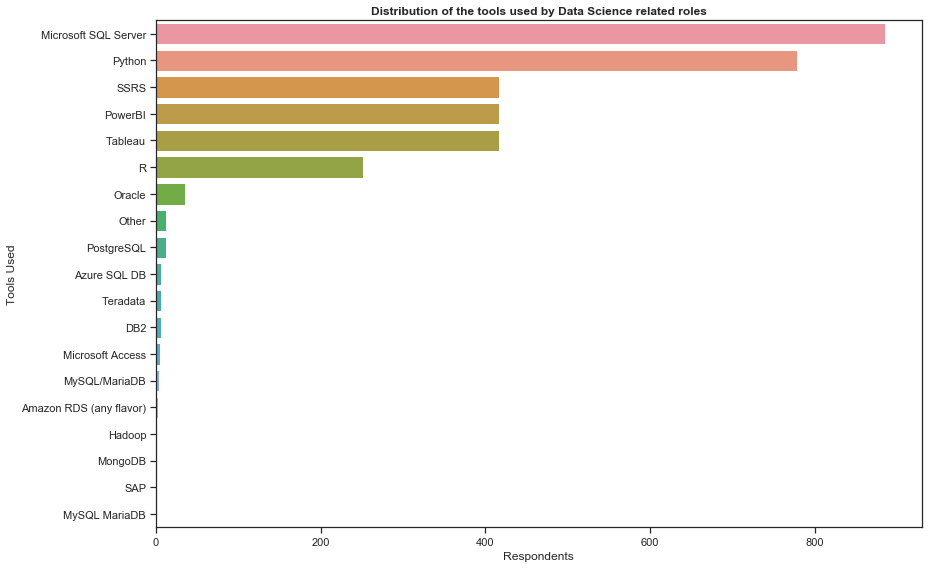

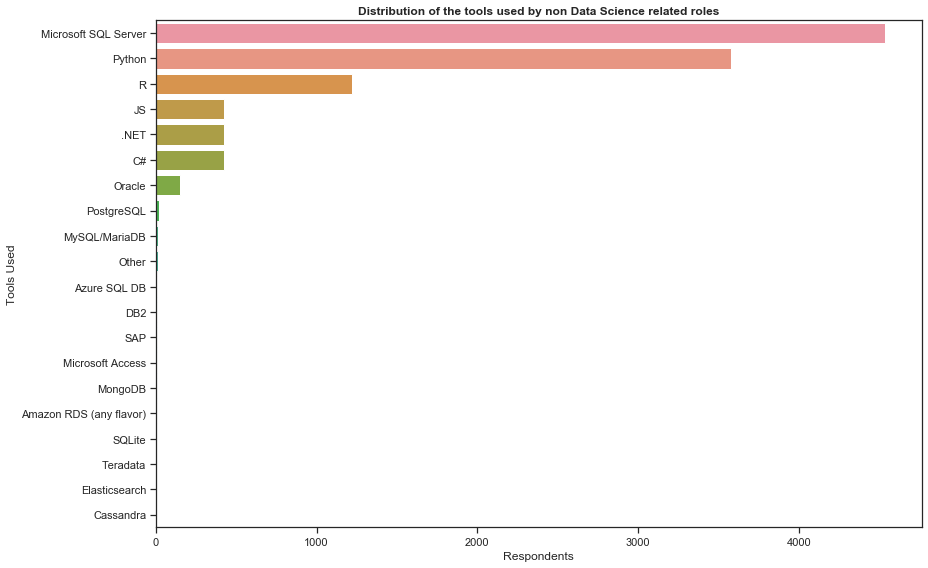

In [100]:
# concatenate all the strings for all the tools used entries based on comma
# in the data science related roles dataset
ds_string = ds_dataset["ToolsUsed"].str.cat(sep = ", ")
# split the string by comma and make it a list
split_ds_string = ds_string.split(",")
ds_map = map(str.strip, split_ds_string) # convert it to a map
ds_series = pd.Series(ds_map) # convert it to a series

plt.figure(figsize = (13, 8)) # set the size of the graph

# plot the graph for the tools, sorted by their counts, used by respondents
# with title and axes labels
ax = sns.countplot(y = ds_series,
                   order = ds_series.value_counts().index)
ax.set_title("Distribution of the tools used by Data Science related roles",
             weight = "bold")
ax.set_xlabel("Respondents")
ax.set_ylabel("Tools Used")
plt.tight_layout() # fit the plot within the figure nicely


# filter the dataset only for non data science related roles
no_ds_dataset = dataset[(dataset.DataScienceRelated == False)]

# concatenate all the strings for all the tools used entries based on comma
no_ds_string = no_ds_dataset["ToolsUsed"].str.cat(sep = ", ")
# split the string by comma and make it a list
split_no_ds_string = no_ds_string.split(",")
no_ds_map = map(str.strip, split_no_ds_string) # convert it to a map
no_ds_series = pd.Series(no_ds_map) # convert it to a series

plt.figure(figsize = (13, 8)) # set the size of the graph

# plot the graph for the tools, sorted by their counts, used by respondents
# with title and axes labels
ax = sns.countplot(y = no_ds_series,
                   order = no_ds_series.value_counts().index)
ax.set_title("Distribution of the tools used by non Data Science related roles",
             weight = "bold")
ax.set_xlabel("Respondents")
ax.set_ylabel("Tools Used")
plt.tight_layout() # fit the plot within the figure nicely

@yedpodtrzitko. (Jul 12, 2010). Answer to question: Python: Removing spaces from list objects [duplicate].
Retrieved from: https://stackoverflow.com/questions/3232953/python-removing-spaces-from-list-objects.
Date accessed: Jan 19, 2020.

 <div class="alert alert-block alert-warning">
    3. What do you think are the most commonly used tools for a data science role?

<span style="color: green">**Answer**</span><br>
According to me, the most commonly tools used for Data Science roles include all the tools that are related with big data, its streaming, analysis, handling and visualisation.
Following is a list of all the tools:

1. Hadoop
2. Spark, Sqoop
3. Hive, HBase

4. Python (Pandas, Matplotlib, Seaborn, Scikit-Learn, NLTK)
5. R
6. Excel

7. Neo4j
8. Cassandra

9. PowerBI
10. Tableau

## 7. Data quality assessment
<a id="trash"></a>

' Garbage in, garbage out'. 

The saying means that poor quality data will return unreliable and often conflicting results. In this task, you need to assess your data set critically and understand not just what its use means for the outcome of your analysis, but also how those insights inform decisions which lead to broader effects. 

 <div class="alert alert-block alert-warning">
 1. Now that you have analysed the data. Go into the data set file and determine two anomalies. These could be parts of the data that don't seem quite right or logically can't co-exist. Write a paragraph about these explaining what part of your analysis alerted you to them, why they are anomalies, why they may exist, and what could be done to fix them. 

<span style="color: green">**Answer**</span><br>
Data with anomalies is bad data. The data seems to become abnormal and unrealistic if anomalies are present.<br>
Outliers is one of the major symptoms of anomalies in any data. Outliers are nothing but data that varies significantly from other observations.<br>
The IT professionals' survey data which was analysed, also contains anomalies, which affects its analysis and visualisations.
Age and salary of the respondents are the two fields where anomalies were detected.<br>
<br>
Age of a respondent is an important demographic in the dataset. But as seen in the graphs and visualisations regarding age, high number of outlier respondents are present. When observed further, the higher range ages of respondents upto the maximum age, occur in the group of 48 years to 64 years. Additionally, many of these respondents possess a years-of-experience of hardly 4 years to 7 years, with education of Bachelors, Associates or no degrees. Surprisingly, these respondents are well paid employees as well, near the median salary. This implies that these employees entered the market at such late age with lower education degrees and very less work experience, and are still getting paid well. This is an unrealistic behavior, and is a remarkable anomaly as it affects the correct information and results.<br>
Another important aspect is the salary of any employee. Similar to age, lot of outlier salary respondents are present in the dataset. The salary numbers which they have entered, approx. Ranging from 350,000 AUD to 1,400,000 AUD, are way too high to be true. Along with this, the details of the leaders in salary field are again unrealistic, with most of them having lower or no education degrees and some also possess less work experience. Altogether, most of the outlier salaries are examples of false data entries, as the maximum salary according to the boxplot lies near 300,000 AUD.<br>
<br>
No constraints for the input fields of the survey might cause people to enter false data or cause human errors. These kind of anomalies can be fixed in the dataset with more data input fields for proof and clarity in the survey, like a breakdown of the respondents' work experience in their career, or setting some ranges for the salary input, and adding certain constraints to the overall data input. These measures may help the surveyors to get more accurate data.

### Well done! You have completed the assignment!

For reassurance, the Australian 2019 Graduate Outcomes Survey found the median salary for Masters graduates in Computer Science and Information Systems for was AUD 92,900 for full-time employment.